In [1]:
library(dplyr)
library(tidyr)
library(ggplot2) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
nefree <-read.csv ("../LPS/nefree.csv")

In [3]:
head(nefree)

FY,COUNTY,CODISTSCH,DISTRICTLNAME,v,FREELUNCH,REDUCEDLUNCH,FREEREDUCEDLUNCH,PERCENT
2017-2018,ADAMS,10003000,KENESAW PUBLIC SCHOOLS,271,54,24,78,28.78
2017-2018,ADAMS,10018000,HASTINGS PUBLIC SCHOOLS,3740,1828,437,2265,60.56
2017-2018,ADAMS,10090000,ADAMS CENTRAL PUBLIC SCHOOLS,921,120,69,189,20.52
2017-2018,ADAMS,10123000,SILVER LAKE PUBLIC SCHOOLS,255,65,41,106,41.57
2017-2018,ADAMS,10701000,CHRIST LUTHERAN ELEMENTARY SCH,56,*,*,10,17.86
2017-2018,ADAMS,10702000,HASTINGS CATHOLIC SCHOOLS,474,40,26,66,13.92


In [14]:
freepercent <- nefree %>%
   top_n(n = 5) %>%
   group_by(DISTRICTLNAME, FY) %>%
    summarize(
       count=n()
    )

Selecting by PERCENT


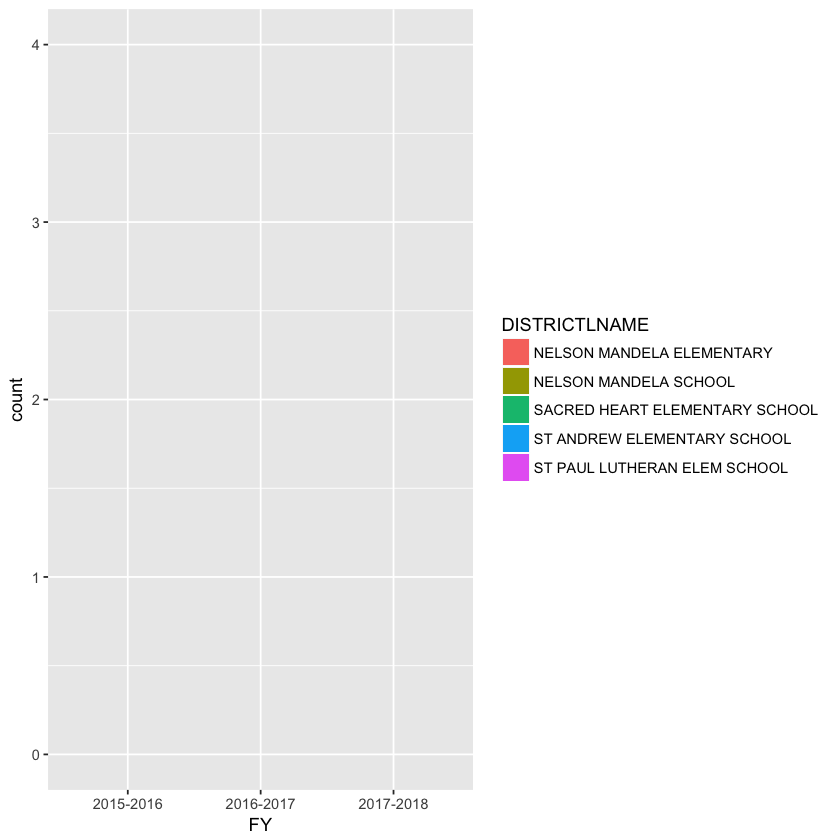

In [15]:
ggplot(freepercent, aes(x=FY, y=count, fill=DISTRICTLNAME)) +
    geom_area()

In [22]:
freelunch <- nefree %>%
    group_by(FY) %>%
    summarize(
       count=n()
    )

In [23]:
percents <- freepercent %>% 
    inner_join(freelunch, by="FY") %>%
    mutate(percentage = (count.x/count.y)*100)

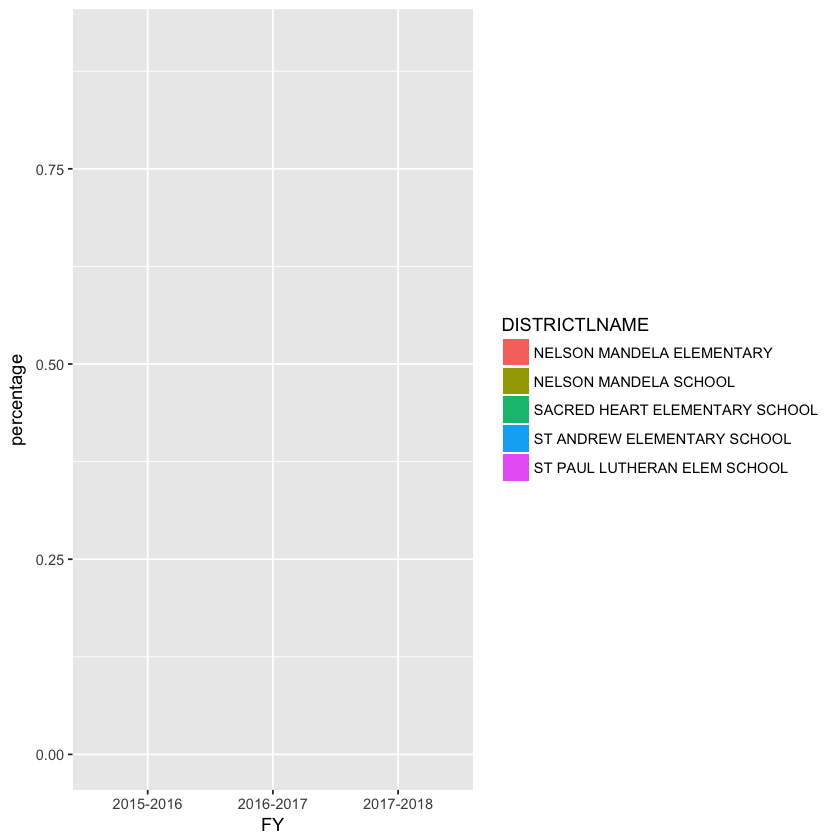

In [24]:
ggplot(percents, aes(x=FY, y=percentage, fill=DISTRICTLNAME)) +
    geom_area() 